In [190]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv('/Users/paigegiese/SYG/landproDATA_code/misc-work/.env')

username = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/landprodata")
query = "SELECT * FROM entities"
df = pd.read_sql(query, con=engine)
df.head()

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,Zip Code,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
2,3,Firm,Developer,RE - Development,A Team Land Consultants LLC,A TEAM LAND CONSULTANTS LLC,1,W101200,312892,LLC,...,83709,2011-03-07,,None,1,None,"EXISTING, ANREPT SENT 08 Jan 2014",,Barbara Broussard,2014-10-07
3,4,Firm,Surveyor,Survey,"Accurate Surveying & Mapping, P.C.","ACCURATE SURVEYING & MAPPING, P.C.",1,C163074,494817,Corp,...,83703,2005-10-24,,None,1,None,"GOODSTANDING, ANREPT SENT 11 Aug 2014",None,Barbara Broussard,2014-10-07
4,5,Agency,Public Agency,,Ada County Highway District,,0,,,Public Agency,...,,1969-12-31,,,2,,,,Barbara Broussard,2014-10-07


In [175]:
df.columns

Index(['ID', 'Entity Group ID', 'Entity Subgroup ID', 'Entity Category',
       'Name', 'IDSOS Name', 'Is Name Confirmed by LPD', 'IDSOS Filing Number',
       'IDSOS Control ID', 'Type', 'Alias', 'Parent', 'Contact Name',
       'Contact Title', 'Address', 'City', 'State', 'Zip Code',
       'IDSOS Filing Date', 'Industry Types', 'Company Size', 'Status', 'URL',
       'Source Comments', 'landproDATA Comments', 'Entered By', 'Entered Time',
       'et_yr'],
      dtype='object')

In [ ]:
def is_na(x):
    try:
        if (pd.isna(x)) or x.strip() =='':
            return 1
        else:
            return 0
    except: 
        pass


In [21]:
df['Is Name Confirmed by LPD'].isna().value_counts()

Is Name Confirmed by LPD
False    13394
Name: count, dtype: int64

In [31]:
df['Is Name Confirmed by LPD'].isna().value_counts()#.apply(is_na)

Is Name Confirmed by LPD
False    13394
Name: count, dtype: int64

In [ ]:
df['IDSOS Filing Number'].value_counts()[0]

IDSOS Filing Number
           2288
390032        2
378050        2
9819          2
D161808       1
C126748       1
W10563        1
D167996       1
C131568       1
W166622       1
C207913       1
C210006       1
W21094        1
W157549       1
W145462       1
W165735       1
C182582       1
L2975         1
W65725        1
D105711       1
C168352       1
D70486        1
D183594       1
D145517       1
W20770        1
W129117       1
C197860       1
D52188        1
D1338         1
C163794       1
Name: count, dtype: int64

In [43]:
df.shape

(13394, 27)

In [79]:
for c in df.columns.tolist():
    if (df[c].dtype == int) | (df[c].dtype==float):
        print(f'{c} nulls: {df[c].isna().value_counts()} || unique values: {df[c].nunique()}')
        print(' ')
    else:
        try:
            print(f'{c} nulls: {df[c].apply(is_na).mean()} || unique values: {df[c].nunique()} || count: {df[c].apply(is_na).sum()}')
            print(' ')
        except: 
            print(c)

ID nulls: ID
False    13394
Name: count, dtype: int64 || unique values: 13394
 
Entity Group ID nulls: 0.06256532775869793 || unique values: 8 || count: 838
 
Entity Subgroup ID nulls: 0.1745557712408541 || unique values: 152 || count: 2338
 
Entity Category nulls: 0.7536956846349111 || unique values: 105 || count: 10095
 
Name nulls: 7.466029565477079e-05 || unique values: 13394 || count: 1
 
IDSOS Name nulls: 0.09967149469911901 || unique values: 12032 || count: 1335
 
Is Name Confirmed by LPD nulls: Is Name Confirmed by LPD
False    13394
Name: count, dtype: int64 || unique values: 4
 
IDSOS Filing Number nulls: 0.286322233836046 || unique values: 9557 || count: 3835
 
IDSOS Control ID nulls: 0.11213976407346574 || unique values: 11853 || count: 1502
 
Type nulls: 0.10728684485590563 || unique values: 63 || count: 1437
 
Alias nulls: 0.9805136628341048 || unique values: 158 || count: 13133
 
Parent nulls: 0.986337165895177 || unique values: 179 || count: 13211
 
Contact Name nulls: 

In [52]:
df.loc[df['Entity Category'].apply(is_na)]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,Zip Code,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07


Text(0.5, 1.0, 'Entered Year')

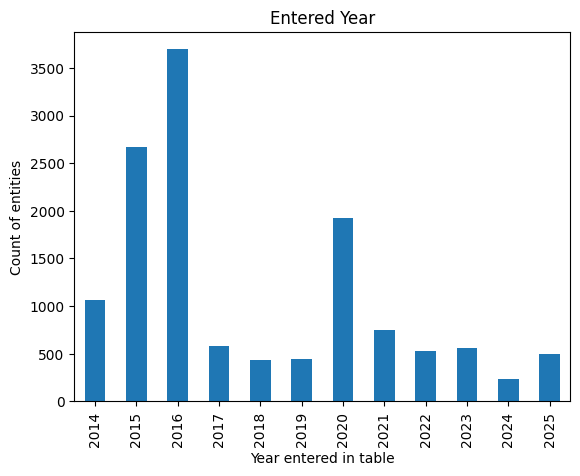

In [83]:
import matplotlib.pyplot as plt
df['et_yr'] = df['Entered Time'].dt.year
df.sort_values(by='et_yr').groupby('et_yr')['ID'].count().plot.bar()
plt.ylabel('Count of entities')
plt.xlabel('Year entered in table')
plt.title('Entered Year')

In [64]:
df.columns

Index(['ID', 'Entity Group ID', 'Entity Subgroup ID', 'Entity Category',
       'Name', 'IDSOS Name', 'Is Name Confirmed by LPD', 'IDSOS Filing Number',
       'IDSOS Control ID', 'Type', 'Alias', 'Parent', 'Contact Name',
       'Contact Title', 'Address', 'City', 'State', 'Zip Code',
       'IDSOS Filing Date', 'Industry Types', 'Company Size', 'Status', 'URL',
       'Source Comments', 'landproDATA Comments', 'Entered By', 'Entered Time',
       'et_yr'],
      dtype='object')

In [75]:
cats = df[['ID','Entity Group ID', 'Entity Subgroup ID', 'Entity Category']].replace('', None)

cat_groups = cats.iloc[:,1:].value_counts().reset_index()

In [179]:
cat_groups.head(25)

,Entity Group ID,Entity Subgroup ID,Entity Category,count
0,Firm,Contractor,RE - Residential,505
1,Firm,Developer,Developer,325
2,Firm,Builder,Builder,225
3,Firm,Surveyor,Survey,180
4,Firm,Contractor,Construction - Excavating,145
5,Firm,Appraiser,Appraisal,139
6,Firm,Engineer,Engineering - Civil,70
7,Firm,Architect,Architectural,70
8,Firm,Contractor,Landscape,56
9,Firm,Bank,Financial Services,43


<Axes: ylabel='Entity Group ID'>

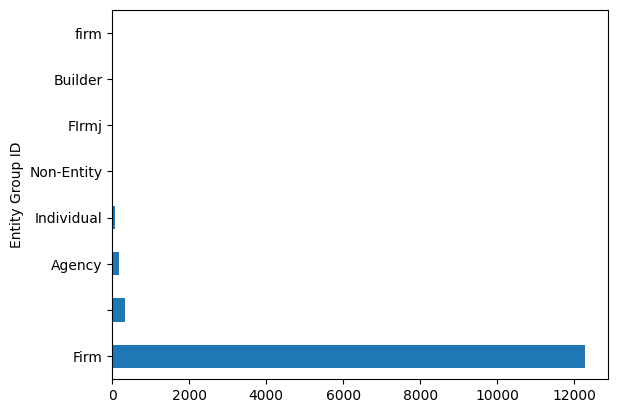

In [89]:
df['Entity Group ID'].value_counts().plot.barh()


In [188]:
df.loc[(df['Name'].str.contains('ailey')) |(df['Name'].str.strip() =='ailey')]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time,et_yr
16,18,Firm,Engineer,Engineering - Civil,"Bailey Engineering, Inc.","BAILEY ENGINEERING, INC.",1,C147150,447945,Corp,...,2003-01-13,,25,1,None,"GOODSTANDING, ANREPT SENT 07 Nov 2013",None,Barbara Broussard,2014-10-07 00:00:00,2014
5264,6227,Firm,Contractor,,INACTIVE - Brian Bailey Homes LLC.,Brian Bailey Homes LLC.,1,W36302,121489,LLC,...,2005-01-27,,,3,,ADMIN DISSOLVED,,Auto-Insert,2016-06-13 00:00:00,2016
7995,9662,Firm,Unknown,,"T Bailey, Inc.","T BAILEY, INC.",1,C125365,384084,Corp,...,1998-08-25,,None,1,None,GOODSTANDING,None,Automatic,2017-12-04 00:00:00,2017
8237,9941,Firm,Unknown,,Bart L Bailey Construction LLC,BART L BAILEY CONSTRUCTION LLC,1,W199703,602329,LLC,...,2018-04-02,,None,1,None,EXISTING,None,Auto-Insert,2018-05-30 00:00:00,2018
8864,10830,Firm,Unknown,,"Bailey Construction and Consulting, LLC","Bailey Construction and Consulting, LLC",0,674793,3580325,Foreign LLC,...,2019-07-26,,,1,,,,Auto-Insert,2019-12-09 00:00:00,2019
9735,11864,Firm,Developer,Developer,"Hailey Storage, Inc.","Hailey Storage, Inc.",1,,513558,Non-Profit Corporation (D),...,2006-10-17,,,1,,,,IDSOS Business Search,2020-05-15 08:08:06,2020
10097,12246,Firm,Builder,Builder,Bailey Builds LLC,Bailey Builds LLC,1,608537,608537,Limited Liability Company (D),...,2018-05-10,,,1,,,,IDSOS Business Search,2020-07-24 14:02:48,2020
10240,12405,Agency,Public Agency,,City of Hailey,None,0,None,None,None,...,None,,None,2,None,None,None,Kris Tatko,2020-08-09 13:39:08,2020
10246,12412,Firm,Engineer,Engineering - Civil,"J.M. Bailey Engineering, PLLC","J.M. BAILEY ENGINEERING, PLLC",0,W207559,62357,Limited Liability Partnership (D),...,2018-08-22,,Individual,9,https://j-m-bailey-engineering-pllc.business.s...,None,Bonneville\nexpertise Highway Design Design wi...,Kris Tatko,2020-08-09 15:26:02,2020
10512,12709,Firm,Owner,,"INACTIVE - Hailey Willow Investment, L.L.C.","Hailey Willow Investment, L.L.C.",1,,24503,Limited Liability Company (D),...,1997-05-16,,,3,,,owner of 1 1998 sub,IDSOS Business Search,2020-09-03 09:21:12,2020


In [189]:
df.loc[(df['Entity Category'].str.contains('lan')) |(df['Entity Subgroup ID'].str.strip() =='lan')]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time,et_yr
88,96,Firm,Planner,Planning,Kent Brown Planning Services LLC,KENT BROWN PLANNING SERVICES LLC,1,W119683,367529,LLC,...,2012-12-07,,None,1,None,"EXISTING, ANREPT SENT 08 Oct 2014",None,Barbara Broussard,2014-10-07 00:00:00,2014
91,99,Firm,Surveyor,Survey/Planning,"INACTIVE - Koerner Land Surveying & Planning, LLC","Koerner Land Surveying & Planning, LLC",1,W82549,257588,LLC,...,2009-03-24,,,3,,"EXISTING, ANREPT SENT 08 Jan 2014",,Barbara Broussard,2014-10-07 00:00:00,2014
146,158,Firm,Planner,Planning,"ULC Management, LLC","ULC MANAGEMENT, LLC",1,W79902,249753,LLC,...,2008-12-15,,None,1,None,"EXISTING, ANREPT SENT 08 Oct 2014",None,Barbara Broussard,2014-10-07 00:00:00,2014
159,171,Firm,Planner,Planning,"SLN Planning, LLC","SLN Planning, LLC",0,C148044,227841,LLC,...,2003-03-06,,,1,,,,Derek Tilzey,2014-11-12 00:00:00,2014
353,381,Firm,Planner,Planning,Riley Planning Services LLC,RILEY PLANNING SERVICES LLC,1,W123555,37885,LLC,...,2013-03-26,,None,8,None,EXISTING,None,Derek Tilzey,2014-11-20 00:00:00,2014
3421,4117,Firm,Architect,Planning,"Architecture Northwest, P.A.","ARCHITECTURE NORTHWEST, P.A.",1,338088,338088,Corp,...,1995-03-09,,None,1,None,GOODSTANDING 09 Mar 1995,None,Barbara Broussard,2015-09-10 00:00:00,2015
3457,4162,Firm,Planner,Planning,Suggs Community Solutions LLC,SUGGS COMMUNITY SOLUTIONS LLC,1,W128652,393649,LLC,...,2013-08-27,,None,1,None,EXISTING,None,Barbara Broussard,2015-09-23 00:00:00,2015
3478,4188,Firm,Architect,Planning,"Insight Architects, PA","INSIGHT ARCHITECTS, PA",1,435232,435232,Corp,...,2002-03-05,,Small,8,https://www.insightarchitects.com/master-plann...,GOODSTANDING,Dana Kauffman & Russ Phillips owner/pricipals,Auto-Insert,2015-10-06 00:00:00,2015
6243,7405,Firm,Contractor,Planning,Planning and Facility Management,PLANNING AND FACILITY MANAGEMENT,1,D26116,91587,Assumed Name,...,1999-05-17,,None,1,None,CURRENT,None,Automatic,2016-09-12 00:00:00,2016
6679,8141,Firm,Contractor,Planning,TTKLA PLLC,TTKLA PLLC,1,W122740,376505,LLC,...,2013-03-05,,,1,,EXISTING,,Automatic,2016-09-12 00:00:00,2016


In [187]:
df.loc[(df['Entity Category'].str.contains('onsult')) |(df['Entity Subgroup ID'].str.strip() =='onsult')]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time,et_yr
7917,9571,Firm,Engineers,Consulting,"Allwest Testing & Engineering, Inc.","Allwest Testing & Engineering, Inc.",0,W10121,629877,Corp,...,2016-12-30,GeoTech Engineering\r\nEnvironmental Services\...,,90,http://www.allwesttesting.com/,CONVERTED,,Auto-Insert,2017-10-20 00:00:00,2017
9101,11126,Firm,Environmental,Consulting,"Bionomics Environmental, Inc.","Bionomics Environmental, Inc.",1,334977,334977,Corp,...,1994-12-22,,,1,,,,Bailey Marion,2020-01-21 00:00:00,2020
9102,11127,Firm,Environmental,Consulting,"PRISM Environmental Services, LLC","PRISM ENVIRONMENTAL SERVICES, LLC",1,280960,28096,LLC,...,2010-02-08,,None,1,None,None,None,Bailey Marion,2020-01-21 00:00:00,2020
9103,11128,Firm,Engineers,Consulting,"Alta Science and Engineering, Inc.","ALTA SCIENCE AND ENGINEERING, INC.",1,631924,631924,Corp,...,2017-07-13,,None,1,None,None,None,Bailey Marion,2020-01-21 00:00:00,2020
9216,11259,Firm,Engineer,Consulting,Steelhead Engineering,,0,,,,...,1969-12-31,,,1,,,no IDSOS filing number,Bailey Marion,2020-02-03 12:32:19,2020
9418,11529,Firm,Engineers,Consulting,"Blakely, Buturla Consulting Engineers","Blakely, Buturla Consulting Engineers",0,,,,...,1969-12-31,,,1,,,no IDSOS filing number,Bailey Marion,2020-02-27 11:22:03,2020
9563,11683,Firm,Surveyor,Consulting,Michael L. Lund Consulting,,0,,,,...,1969-12-31,,,1,,,no IDSOS filing number,Bailey Marion,2020-04-20 14:22:10,2020
9730,11859,Firm,"Engineer, Surveyor",Consulting,"INACTIVE - Hansen Associates, Inc.","Hansen Associates, Inc.",0,,166099,Corp,...,1975-06-03,,,3,,,,Bailey Marion,2020-05-14 14:57:54,2020
9768,11898,Firm,Engineer,Consulting,"INACTIVE - Jamar Associates, Inc.","Jamar Associates, Inc.",1,,434909,General Business Corporation (D),...,2002-02-25,,,3,,,last related data sub recorded in 2009,IDSOS Business Search,2020-05-19 09:33:27,2020
9877,12022,Firm,Engineer,Consulting,"Winzler & Kelly, Consulting Engineers","WINZLER & KELLY, CONSULTING ENGINEERS",1,None,188343,Foreign Business Corporation,...,1978-08-03,,None,1,None,None,None,IDSOS Business Search,2020-06-24 13:35:15,2020


In [182]:
df.loc[(df['Entity Category'].str.strip() =='Government Agency') |(df['Entity Category'].str.strip() =='Government Agency')]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time,et_yr
2816,3326,Agency,Public Agency,Government Agency,Urban Renewal Agency of Boise City,,0,,,,...,1969-12-31,,,2,,,,Kyel Shippey,2015-07-27 00:00:00,2015
6064,7179,Agency,Public Agency,Government Agency,Bureau of Land Management,None,0,None,None,None,...,None,,None,2,None,None,None,Kyel Shippey,2016-09-09 00:00:00,2016
6071,7188,Agency,Public Agency,Government Agency,Ada County Assessor,None,0,None,None,None,...,None,,None,2,None,None,None,Kyel Shippey,2016-09-09 00:00:00,2016
6697,8163,Agency,Public Agency,Government Agency,Washington County Assessor,None,0,None,None,None,...,None,,None,2,None,None,No IDSOS Filing Number. Public Agency.,Kyel Shippey,2016-09-13 00:00:00,2016
6720,8189,Agency,Public Agency,Government Agency,Idaho Department of Labor,None,0,None,None,None,...,None,,None,2,None,None,None,Kyel Shippey,2016-09-13 00:00:00,2016
6722,8191,Agency,Public Agency,Government Agency,Idaho Department of Water Resources,None,0,None,None,None,...,None,,None,2,None,None,None,Kyel Shippey,2016-09-13 00:00:00,2016
7195,8755,Agency,Public Agency,Government Agency,Urban Renewal Agency of the City of Caldwell,,0,,,,...,1969-12-31,,,2,,,,Kyel Shippey,2016-11-08 00:00:00,2016
7198,8758,Agency,Public Agency,Government Agency,Idaho State Building Authority,,0,,,,...,1969-12-31,,,2,,,,Kyel Shippey,2016-11-08 00:00:00,2016
7204,8765,Agency,Public Agency,Government Agency,Urban Renewal Agency for the City of Meridian,,0,,,,...,1969-12-31,,,2,,,,Kyel Shippey,2016-11-08 00:00:00,2016
8229,9933,Agency,Public Agency,Government Agency,USDA Forest Service,,0,,,,...,1969-12-31,,,2,,,,Kris Tatko,2018-05-07 00:00:00,2018


In [181]:
df.loc[(df['Entity Subgroup ID'].str.strip() =='Government Agency') |(df['Entity Subgroup ID'].str.strip() =='Government Agency')]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time,et_yr
9692,11820,Agency,Government Agency,Environmental,U.S. Department of Agriculture (Forest Service),,0,,,,...,1969-12-31,,,2,,,no IDSOS filing number,Bailey Marion,2020-05-12 08:45:39,2020
10602,12812,Agency,Government Agency,Government Agency,Panhandle Health District,,0,,,,...,1969-12-31,,,2,https://panhandlehealthdistrict.org/,,no IDSOS filing number,Julissa Wolf,2020-11-10 16:28:31,2020


In [92]:
df['Entity Category'].value_counts()[:20]

Entity Category
                              10095
RE - Residential                574
Developer                       401
Builder                         262
Survey                          223
Construction - Excavating       149
Engineering - Civil             144
Appraisal                       142
Engineering - Full Service      110
Architectural                   109
Financial Services              100
Construction                     92
RE - Commercial                  78
Other                            76
Landscape                        66
Irrigation                       52
Remodeling                       39
Law                              37
Builder/Developer                33
Roofing                          31
Name: count, dtype: int64

In [ ]:
subgroups_extended = []
for i, j in df.iterrows():
    if ',' in j['Entity Subgroup ID']:
        subgroups_extended.extend(j['Entity Subgroup ID'].split(','))
    else:
        subgroups_extended.append(j['Entity Subgroup ID'])

In [118]:
subgroups = pd.Series(subgroups_extended)
subgroups = [(s.strip()) for s in subgroups]


pd.Series(subgroups).value_counts()

Contractor               5315
                         2338
Developer                1493
Unknown                  1287
Builder                  1093
                         ... 
Sprinkler                   1
Window and Door Sales       1
Car Sales                   1
Concrete Repair             1
Building                    1
Name: count, Length: 127, dtype: int64

In [132]:
x = pd.Series(subgroups).value_counts()
x.index[1]

''

In [133]:
subgroups = pd.DataFrame(pd.Series(subgroups).drop_duplicates(), columns=['entity_subgroup_id'])
subgroups = subgroups.loc[subgroups['entity_subgroup_id']!= '']

In [143]:
ec_extended = []
for i, j in df.iterrows():
    if ',' in j['Entity Category']:
        ec_extended.extend(j['Entity Category'].split(','))
    else:
        ec_extended.append(j['Entity Category'])

In [144]:

e_category = pd.DataFrame(pd.Series(ec_extended).drop_duplicates(), columns=['entity_category'])
e_category = e_category.loc[e_category['entity_category']!= '']


In [150]:
e_category['column_name'] = 'Entity Category'
e_category.rename(columns={'entity_category':'value'}, inplace=True)

subgroups['column_name'] = 'Entity Subgroup ID'
subgroups.rename(columns={'entity_subgroup_id':'value'}, inplace=True)

entity_values = pd.concat([e_category,subgroups])

entity_values['value'].nunique()

203

In [153]:
from openai import OpenAI
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from dotenv import load_dotenv
load_dotenv("/Users/paigegiese/SYG/landproDATA_code/misc-work/.env")
oai_client = OpenAI(api_key =os.getenv("LANDPRO_OAI_KEY"))


embeddings = []

for i in range(len(entity_values['value'].tolist())):
    embedding = oai_client.embeddings.create(
        input=entity_values['value'].tolist()[i], model="text-embedding-3-small"
    ).data[0].embedding
    embeddings.append(embedding)


similarity_matrix = cosine_similarity(embeddings)


# threshold = 0.50
# pairs = []
# for i in range(len(entity_values['value'].tolist()[:45])):
#     for j in range(i + 1, len(entity_values['value'].tolist()[:45])):
#         sim = similarity_matrix[i][j]
#         if sim >= threshold:
#             pairs.append((entity_values['value'].tolist()[:45][i], entity_values['value'].tolist()[:45][j], round(sim, 3)))


# for p1, p2, score in sorted(pairs, key=lambda x: -x[2]):
#     print(f"{p1:<25} <--> {p2:<25} | similarity: {score}")


In [159]:
threshold = 0.5
pairs = []
for i in range(len(entity_values['value'].tolist())):
    for j in range(i + 1, len(entity_values['value'].tolist())):
        sim = similarity_matrix[i][j]
        if (sim >= threshold) :
            pairs.append((entity_values['value'].tolist()[i], entity_values['value'].tolist()[j], round(sim, 3)))

pairs_of_words=[]
for p1, p2, score in sorted(pairs, key=lambda x: -x[2]):
    if score < 1:
        print(f"{p1:<25} <--> {p2:<25} | similarity: {score}")
        pairs_of_words.append([p1,p2,score])

RE- Commercial            <--> RE-Commercial             | similarity: 0.976
Homeowners Association    <--> Homeowner's Association   | similarity: 0.97
RE- Residential           <--> Re - Residential          | similarity: 0.946
Developer                 <-->  Developer                | similarity: 0.94
 Developer                <--> Developer                 | similarity: 0.94
RE - Residential          <--> RE- Residential           | similarity: 0.936
Remodeling                <--> Remodel                   | similarity: 0.926
Remodeling                <--> Remodel                   | similarity: 0.926
Survey                    <-->  Survey                   | similarity: 0.922
 Survey                   <--> Survey                    | similarity: 0.922
Engineer - Civil          <--> Engineer-Civil            | similarity: 0.919
RE - Commercial           <--> RE- Commercial            | similarity: 0.906
RE - Residential          <--> Re - Residential          | similarity: 0.904
En

In [164]:
pairs_of_words_df = pd.DataFrame(pairs_of_words, columns =['version1','version2','similarity_score'])

In [172]:
pairs_of_words_df.to_csv('/Users/paigegiese/Downloads/entities_word_sim.csv', index=False)#.loc[(pairs_of_words_df['version1'] =='Constractor')]


## Protoyping the name conversions

In [198]:
from typing import TypedDict, List, Dict, Any, Optional
from pydantic import BaseModel, Field
from typing import TypedDict, List, Dict, Any, Optional, Annotated, Literal
oai_client = OpenAI(api_key =os.getenv("LANDPRO_OAI_KEY"))

These categories require a query: 

- Builder, Developer
- Developer

In [192]:
df.head(2)

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,Zip Code,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07


In [195]:
original_values = df[['ID','Entity Group ID','Entity Subgroup ID','Entity Category','Name']].replace("", None)

In [196]:
original_values.to_dict('records')

[{'ID': 1,
  'Entity Group ID': 'Firm',
  'Entity Subgroup ID': 'Surveyor',
  'Entity Category': 'Survey',
  'Name': '2 Bar K Land Surveying'},
 {'ID': 2,
  'Entity Group ID': 'Firm',
  'Entity Subgroup ID': 'Surveyor',
  'Entity Category': 'Survey',
  'Name': '4 Rivers Surveying Inc.'},
 {'ID': 3,
  'Entity Group ID': 'Firm',
  'Entity Subgroup ID': 'Developer',
  'Entity Category': 'RE - Development',
  'Name': 'A Team Land Consultants LLC'},
 {'ID': 4,
  'Entity Group ID': 'Firm',
  'Entity Subgroup ID': 'Surveyor',
  'Entity Category': 'Survey',
  'Name': 'Accurate Surveying & Mapping, P.C.'},
 {'ID': 5,
  'Entity Group ID': 'Agency',
  'Entity Subgroup ID': 'Public Agency',
  'Entity Category': None,
  'Name': 'Ada County Highway District'},
 {'ID': 6,
  'Entity Group ID': 'Agency',
  'Entity Subgroup ID': 'Public Agency',
  'Entity Category': None,
  'Name': "Ada County Surveyor's Office"},
 {'ID': 7,
  'Entity Group ID': 'Firm',
  'Entity Subgroup ID': 'Surveyor',
  'Entity Cate

In [197]:
rules = [{'Entity Category': 'Surveying', 'Entity Subgroup ID': "Subgroup shall be left NULL",'commentary': "will be separate from engineering unless included within an Engineering. See Engineering Category rule."},
{'Entity Category': 'Contractor', 'Entity Subgroup ID': '<insert specialty here>','commentary': "Shall include records that indicate construction as a general contractor or sub contractor. \
 In the case of a specialty contracting, like 'HVAC', specify the specialty in the 'Entity Subgroup ID' key."},
{'Entity Category': 'Builder', 'Entity Subgroup ID': "'Residential', 'Commercial', or NULL if both'",'commentary': "Home builders are denoted with 'Residential' subgroup."},
{'Entity Category': 'Engineering', 'Entity Subgroup ID': "Insert specialty(ies) if known. 'Full service', if known.",'commentary': "Shall include all different engineering professions and specialities. The subgroup will be 'Full Service' if specified in input data. Denote the specialty (e.g. 'Civil') in Subgroup ID. If multiple, separate the specialities using commas."},
{'Entity Category': 'Real Estate', 'Entity Subgroup ID': "Subgroup will be NULL unless otherwise specified as 'Residential','Commercial','Land', or a comma separated combination of those values. 'Land' can be used as a Subgroup to identify Land Brokers.",'commentary': "Expand 'RE' in the input data to 'Real Estate'"},
{'Entity Category': 'Agency', 'Entity Subgroup ID': "Attempt the following valid values: 'Water', 'Road', Assessor', 'Municipality', 'Land', 'Health', 'Urban Renewal', 'Fire', 'Ancillary'. ONLY use Ancillary if no other category makes sense in context.",'commentary': "NOTE: all Agencies should be marked 'Public' in the Entity Group ID key."},
{'Entity Category': 'Title', 'Entity Subgroup ID': "NULL",'commentary': "Used to identify Private title companies."},
{'Entity Category': 'Architect', 'Entity Subgroup ID': "NULL unless 'Landscape', then place 'Landscape' as the Subgroup.",'commentary': ""},
{'Entity Category': 'Inspection', 'Entity Subgroup ID': "Attempt the following value values: 'Home','Electrical','Fire','Health','Other'. Use 'Other' if none of the valid values make sense.",'commentary': ""},
{'Entity Category': 'Appraisal','Entity Subgroup ID': "NULL", 'commentary':"you will find 'Appraiser' often in the input data"},
{'Entity Category': 'Homeowners Association','Entity Subgroup ID': "NULL", 'commentary':"Note that values 'HOA' are equivalent. Translate to 'Homeowners Association'"},
{'Entity Category': 'Other','Entity Subgroup ID': "NULL", 'commentary':"Use only in the event that you are not confident in the reclassification."}]


In [ ]:
class Candidate(BaseModel):
    entity_group_id: Annotated[Literal['Public','Private'], Field(description="Input key: 'Entity Group ID'. Apply rules in the system prompt.")]
    entity_category:Annotated[str, Field(description="Input key: 'Entity Category'. Apply rules in the system prompt.")]
    entity_subgroup_id:Annotated[str, Field(description="Input key: 'Entity Subgroup ID'. Apply rules in the system prompt. Be as consistent as possible.")]
    confidence: Annotated[float, Field(description="Based on the input data, how confident are you that this should be a candidate classification? 0-100 scale only.")]
    reasoning: Annotated[str, Field(description="Reasoning for evaluating a secondary classification to be a valid candidate.")]

class Reclassify(BaseModel):
    entity_group_id: Annotated[Literal['Public','Private'], Field(description="Input key: 'Entity Group ID'. Apply rules in the system prompt.")]
    entity_category:Annotated[str, Field(description="Input key: 'Entity Category'. Apply rules in the system prompt.")]
    entity_subgroup_id:Annotated[str, Field(description="Input key: 'Entity Subgroup ID'. Apply rules in the system prompt. Be as consistent as possible.")]
    confidence: Annotated[float, Field(description="Based on the input data, how confident are you that this should be the classification? 0-100 scale only.")]
    candidates: Annotated[List[Candidate], Field("Returns a list of candidate classifications, based on multiple rules evaluating to True.")] 

class ReclassifyList(BaseModel):
    reclassified: Annotated[List[Reclassify], Field("Preserve the list in the SAME ORDER as the input list")]

system_prompt = """ ## Role\
You are data cleaning assistant tasked with cleaning our entities information. It's incredibly important that you adhere to the rules as outlined below, applying them precisely and \
    giving indication as to your degree of uncertainty when applicable.

## Understand the input
You will receive input in the following format:

{
  'Entity Group ID': 'Firm',
  'Entity Subgroup ID': 'Surveyor',
  'Entity Category': 'Survey',
  'Name': '2 Bar K Land Surveying'
}

## Understanding the meaning of common formatting in the input data
- RE refers to 'Real Estate'. All instances of "RE" should be expanded to 'Real Estate' for reclassification
- Categories and subgroups may be combined in the input data. For example 'Engineer - Civil' would reclassify to: Entity Group ID: 'Private', Entity Category: 'Engineering', Entity Subgroup ID: 'Civil'
- You will come across spelling and formatting errors in the input. Remove apostrophes in values. 
    
## Rules\
Use the context and semantic meaning from the 4 input keys to correctly re-classify Entity Group ID, Entity Subgroup ID, and Entity Category.
In general, determine the correct Entity Group ID, then Entity Category, then define the Subgroup. Follow the values provided below with precision.

Here are the rules: {rules}


## Process Steps:
1. Examine the input data for the 4 keys. 
2. Carefully consider EACH of the provided rules.
3. Determine a classification based on comparing the input data against all rules. Specifically for Categories, use the Exacting language noted in the rules. Note, for subgroup, apply consistency in selecting the values.
4. IMPORTANT: If you determine multiple rules apply or conflict, indicate the secondary, tertiary... through n, candidate changes in the 'candidates' k-v pair list

## Final Instructions:
Return the reclassified information according to the json schema provided.

"""
def ocr(text):
    response = oai_client.responses.parse(
        model="gpt-4.1-mini",
        input=[
            {"role": "system", "content": "You are a helpful assistant at interpreting raw text extracted from complex land and parcel documents and surveys. \
             ##Precise instructions:\
             1. Carefully analyze the extracted text from the OCR process. The text is presented as one blob, but in its original form on the plat there are distinct sections. Keep this in mind.\
                Do not use prior knowledge or information from outside the context to answer the questions. Only use the information provided in the context to answer the questions.\
             2. Review the required JSON structure for the response\
             3. Fulfill the request to the best of your ability\
             ## Formatting Instructions\
             Use as precise of language as possible. Do not include any explanation in the reply. Only include the extracted information in the reply.\
             Only in 'inferred_context' are you allowed to practice freedom of explanation."},
            
            {"role": "user", "content": f"Return your interpretation of the following OCR text using the structured output model provided: {text}"}
        ],
        text_format = Document
    )
    return response